<font size="5">

# LET measurements 2022: MG.REF preparations

<font size="3">

> __Author:__ A. Backis
<br/>__Institute:__ University of Glasgow (UoG), European Spallation Source (ESS)
    
> __Author:__ R. Wahlén
<br/>__Institute:__ , Lund University (LU), European Spallation Source (ESS)
<br/>__Date:__ 21/2-2022

_Abstract:_
This notebook contains the data analysis used for preparations with the MG.REF Multi-Grid detector.

# Contents
    
* [1. Introduction](#INTRODUCTION)
    * [1.1 Packages](#PACKAGES)
    * [1.2 Parameters](#PARAMETERS)
* [2. Plotting](#PLOTTING)

#  Introduction<a class="anchor" id="INTRODUCTION"></a>

This notebook outlines the preparations made with the MG.REF detector.

## Packages<a class="anchor" id="PACKAGES"></a>

Import the required packages.

In [1]:
# Autoload packages when doing an external change
%load_ext autoreload
%autoreload 2

# Ensure custom packages can be reached
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Install packages
!{sys.executable} -m pip install ipympl

# General packages
import numpy as np
import pandas as pd

# Local packages
import file_handling.mg_mesytec_manage_seq as mg_manage_seq
import file_handling.mg_mesytec_manage_ref as mg_manage_ref
import file_handling.mg_mesytec_seq_read_and_cluster as mg_read
import file_handling.mg_mesytec_ref_read_and_cluster as mg_read_ref
import file_handling.mg_read as mg_read_old
import file_handling.mg_manage as mg_manage_old
import plotting.mg_mesytec_basic_plot as mg_basic_plot
import plotting.mg_ref_mesytec_basic_plot as mg_basic_plot_ref

# Activate matplotlib in interactive notebook mode
%matplotlib widget

## Parameters<a class="anchor" id="PARAMETERS"></a>

Define global parameters.

In [11]:
# Paths to folders containing data
nb_path = os.getcwd()
MG_RAW_FOLDER = nb_path + '/../data/mg_ref/raw/MG.CSPEC-Ref_Data/'
MG_RAW_FOLDER_seq = nb_path + '/../data/mg_ref/raw/'
MG_RAW_FOLDER_stf = nb_path + '/../data/mg_ref/raw/MG.CSPEC-Ref_STF/'
MG_PROCESSED_FOLDER = nb_path + '/../data/mg_ref/processed/'
tdc_to_h= (62.5e-9)/(60 ** 2)
tdc_to_s= (62.5e-9)
# MG standard filter
mg_filter = {'wm': [1, 1, True],                   # Wire multiplicity
             'gm': [1, 5, True],                   # Grid multiplicity
             'wadc': [150, np.inf, True],          # Wire charge
             'gadc': [150, np.inf, True],          # Grid charge
             'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
             'time': [8.25/tdc_to_h, np.inf, True],            # Time (TDC channels)
             'bus': [0, 1, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'max_dist': [0, 1, False],            # MAximum jump of grids in coincidance      
             'gch': [81, 118, True]}               # Grid channel, bottom=64 to top=100

mg_filter_seq2 = {'wm': [1, 1, True],                   # Wire multiplicity
             'gm': [1, 5, True],                   # Grid multiplicity
             'wadc': [800, np.inf, True],          # Wire charge
             'gadc': [800, np.inf, True],          # Grid charge
             'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
             'time': [0, np.inf, True],            # Time (TDC channels)
             'bus': [0, 1, False],                 # Bus
             'flag': [0, 1, False],                # =1 if different buses within same coincidence
             'layer': [0, 19, False],              # Layer, front=0 to back=19
             'row': [0, 11, False],                # Row, right to left (seen from neutrons)
             'max_dist': [0, 1, False],            # MAximum jump of grids in coincidance      
             'gch': [99, 99, True]}               # Grid channel, bottom=64 to top=100

mg_no_filter = {'wm': [1, 1, False],                  # Wire multiplicity
                'gm': [1, 5, False],                  # Grid multiplicity
                'wadc': [800, np.inf, False],         # Wire charge
                'gadc': [800, np.inf, False],         # Grid charge
                'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                'time': [0, np.inf, True],            # Time (TDC channels)
                'bus': [0, 9, False],                 # Bus
                'flag': [0, 1, False],                # =1 if different buses within same coincidence
                'layer': [0, 15, False],              # Layer, front=0 to back=19
                'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                'max_dist': [0, 1, False],            # MAximum jump of grids in coincidance      
                'gch': [81, 118, False]}              # Grid channel, bottom=64 to top=100

mg_time_filter = {'wm': [0, 0, True],                # Wire multiplicity
                'gm': [1, 5, False],                  # Grid multiplicity
                'wadc': [800, np.inf, False],         # Wire charge
                'gadc': [800, np.inf, False],         # Grid charge
                'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                'time': [0, np.inf, True],           # Time (TDC channels)
                'bus': [2, 2, True],                 # Bus
                'flag': [0, 1, False],                # =1 if different buses within same coincidence
                'layer': [0, 15, False],              # Layer, front=0 to back=19
                'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                'max_dist': [0, 1, False],            # MAximum jump of grids in coincidance      
                'gch': [81, 118, False]}              # Grid channel, bottom=64 to top=100

mg_coincidence_filter = {'wm': [1, 1, True],                 # Wire multiplicity
                       'gm': [1, 5, True],                   # Grid multiplicity
                       'wadc': [150, np.inf, True],          # Wire charge
                       'gadc': [150, np.inf, True],          # Grid charge
                       'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                       'time': [8.25/tdc_to_h, np.inf, True],            # Time (TDC channels)
                       'bus': [9, 9, True],                 # Bus
                       'flag': [0, 1, False],                # =1 if different buses within same coincidence
                       'layer': [0, 15, False],              # Layer, front=0 to back=19
                       'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                       'max_dist': [0, 3, False],            # Maximum jump of grids in coincidance      
                       'gch': [97, 131, True]}               # Gridchannels

mg_charge_filter = {'wm': [1, 1, False],                 # Wire multiplicity
                       'gm': [1, 5, False],                   # Grid multiplicity
                       'wadc': [800, 4095, True],          # Wire charge
                       'gadc': [800, 4095, True],          # Grid charge
                       'tof': [0, np.inf, True],             # Time-of-flight (TDC channels)
                       'time': [0, np.inf, True],            # Time (TDC channels)
                       'bus': [9, 9, False],                 # Bus
                       'flag': [0, 1, False],                # =1 if different buses within same coincidence
                       'layer': [0, 15, False],              # Layer, front=0 to back=19
                       'row': [0, 11, False],                # Row, right to left (seen from neutrons)
                       'max_dist': [0, 3, False],            # Maximum jump of grids in coincidance      
                       'gch': [97, 131, False]}               # Gridchannels

# MG standard parameters
mg_area_ref = 0.025*0.025*4*35 # m^2
mg_area_seq2 = 0.025*0.025*4*3 # m^2
mg_area = 0.0225*0.0225*4*38 # m^2
print(mg_area,mg_area_ref)

0.07694999999999999 0.08750000000000002


# Plotting<a class="anchor" id="PLOTTING"></a>

## Summeries

In [3]:
# Extract data: For bus 0 and 1
#file_name = 'NoGas_mvmelst_298_220315_092727'
#file_name='shielded_gas_working_run_2_mvmelst_300_220316_084149'
#file_name='shielded_run_3_mvmelst_301_220317_083909'
#file_name='Unshildes_STF_run1_CSPEC-LET_Utgard_220323_181605'
file_name='Unshielded_run2_CSPEC-LET_Utgard_220324_111809'
#file_name='shielded_weekend_run_mvmelst_302_220318_085531'
file_path = MG_RAW_FOLDER_stf + file_name + '.zip'
#mg_manage_seq.extract_and_save(file_name, file_path, MG_PROCESSED_FOLDER) # Only have to run this once
mg_clu_run_1, mg_ev_run_1 = mg_manage_seq.load_clusters_and_events(file_name, MG_PROCESSED_FOLDER)



                                        Finished!


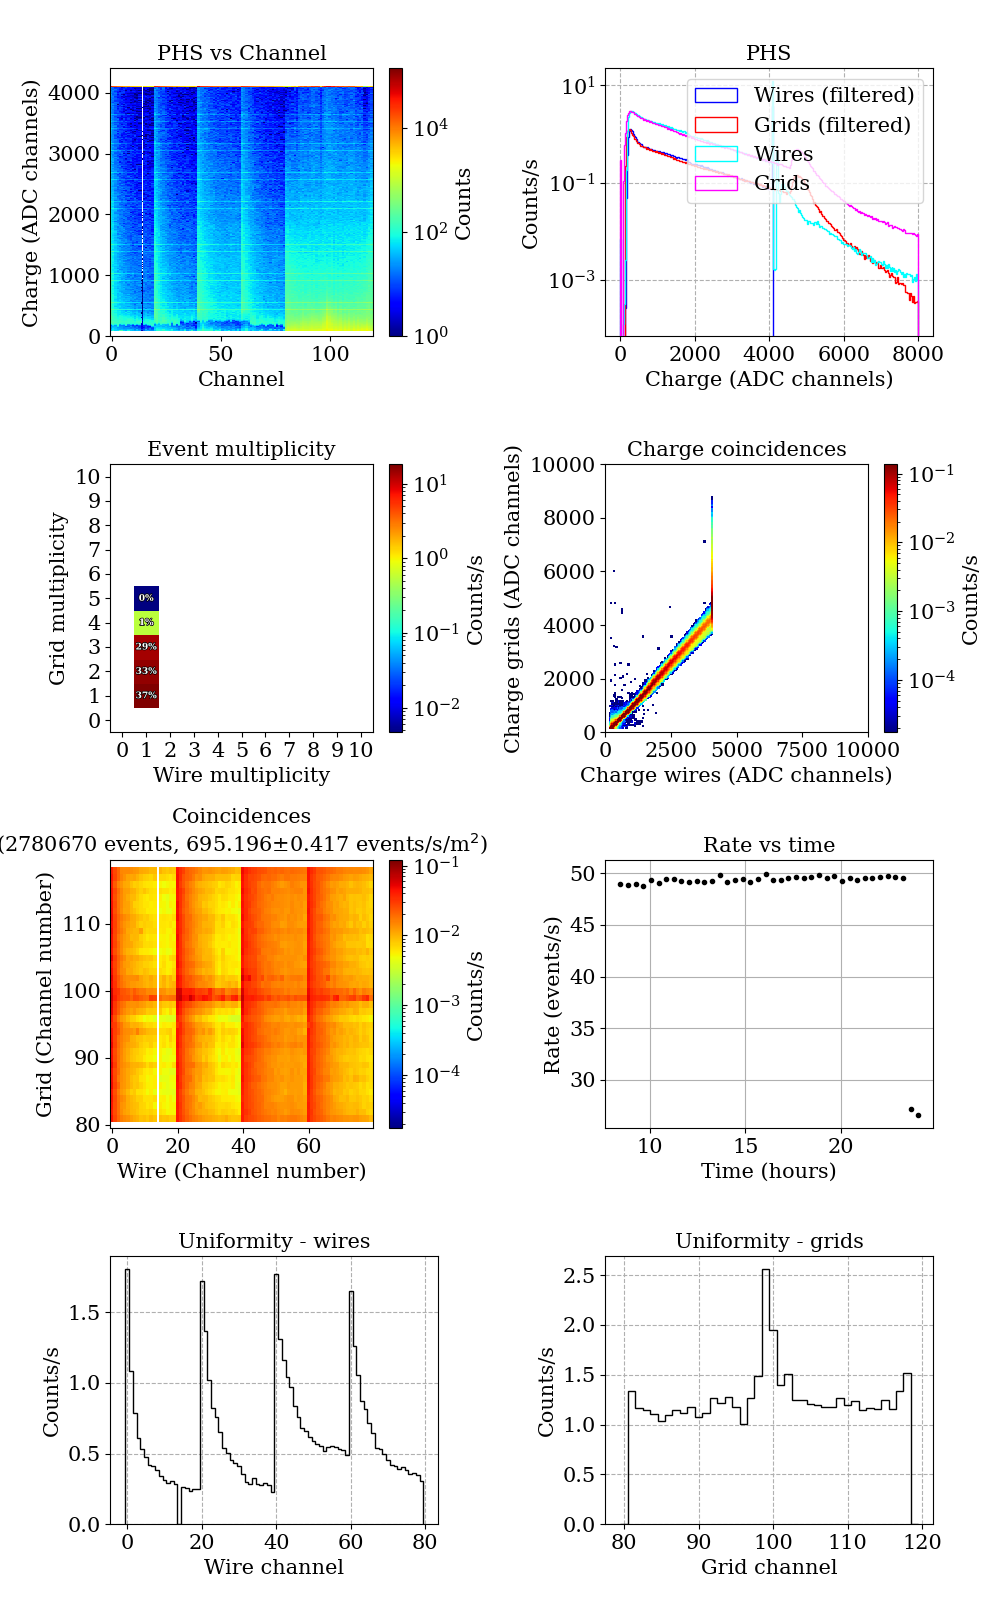

In [12]:
bus = 0
# Possebileties to not add last 4 wires and some middle grids
#clusters_16w=mg_clu_run_1[~mg_clu_run_1.wch.isin([16,17,18,19,36,37,38,39,56,57,58,59,76,77,78,79])]
#clusters_3_gr=clusters_16w[clusters_16w.gch.isin([98,99,100])]
mg_basic_plot.mg_plot_basic_bus(file_name +'_filtered_LOW_charge_filt_after_gen_off', bus, mg_clu_run_1, mg_ev_run_1, mg_filter, mg_area-mg_area_seq2)

In [ ]:
bus=1
mg_basic_plot.mg_plot_basic_bus(file_name +'_filtered_wo_last_4_w', bus, mg_clu_run_1, mg_ev_run_1, mg_filter, mg_area)

In [5]:
events_ord=mg_manage_ref.reorder_channels_events(mg_ev_run_1)
clusters_ord=mg_manage_ref.reorder_channels_clusters(mg_clu_run_1)
    

Filtering events
Filtering clusters


In [ ]:
mg_manage_ref.extract_and_save(file_name+'_ref', file_path, MG_PROCESSED_FOLDER) # Only have to run this once
mg_clu_run_1, mg_ev_run_1 = mg_manage_seq.load_clusters_and_events(file_name+'_ref', MG_PROCESSED_FOLDER)

In [ ]:
#file_name = 'shielded_gas_shutoffpart_mvmelst_297_220314_171947'
#file_name='shielded_gas_working_mvmelst_299_220315_131621'
#file_name='shielded_gas_working_run_2_mvmelst_300_220316_084149'
#file_name='shielded_run_3_mvmelst_301_220317_083909'
#file_name='shielded_weekend_run_mvmelst_302_220318_085531'
file_name='Unshildes_STF_run1_CSPEC-LET_Utgard_220323_181605'
file_path = MG_RAW_FOLDER_stf + file_name + '.zip'
unzipped_path = mg_read.unzip_data(file_path)
data = mg_read.import_data(unzipped_path)

In [ ]:
# Extract clusters: Bunches together bus 2 and 3 to bus 9
clusters, grid_channels, grid_adc = mg_read_ref.extract_clusters(data)
events = mg_read_ref.extract_events(data)
# Extract clusters and events for bus 0 and 1
#clusters01_raw = mg_read.extract_clusters(data)
#events01 = mg_read.extract_events(data)

In [ ]:
run=file_name
mg_manage_ref.save_data(events_ord, MG_PROCESSED_FOLDER+run + '_ev.h5')
mg_manage_ref.save_data(clusters_ord, MG_PROCESSED_FOLDER+run + '_ev.h5')

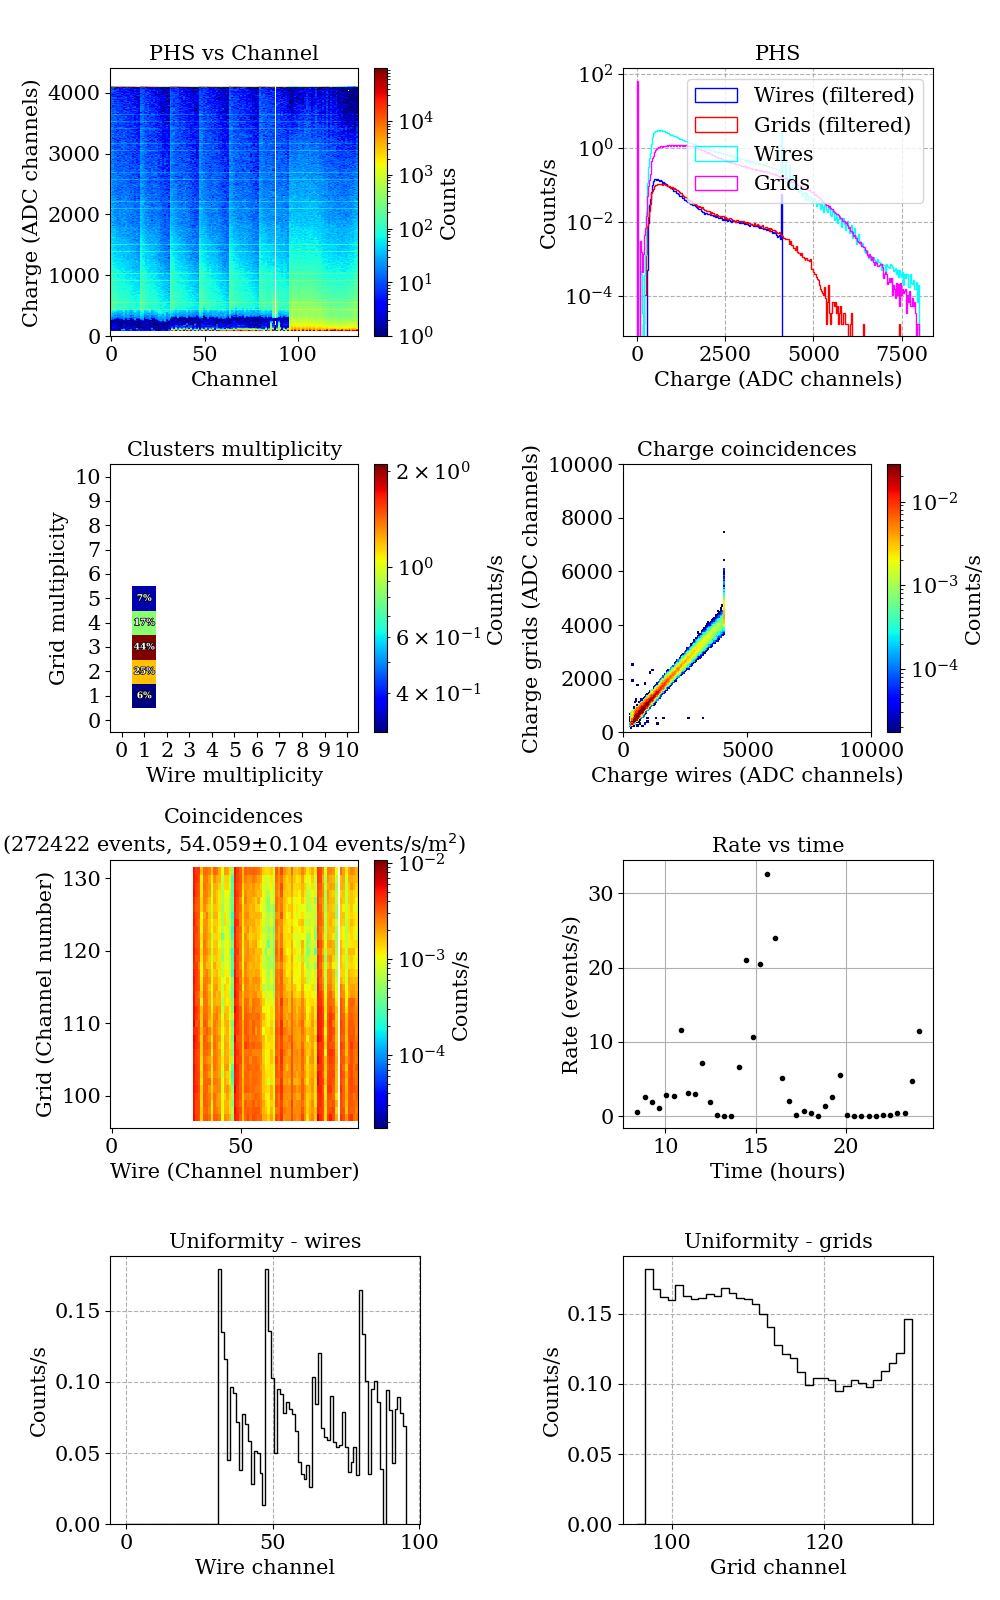

In [15]:
bus=9
mg_basic_plot_ref.mg_plot_basic_bus(file_name +'_filtered_ord_LOW_charge_filt_after_gen_off', bus, clusters_ord, events_ord, mg_coincidence_filter, mg_area_ref)

## Plotting PHS comaparison

### Total from all buses

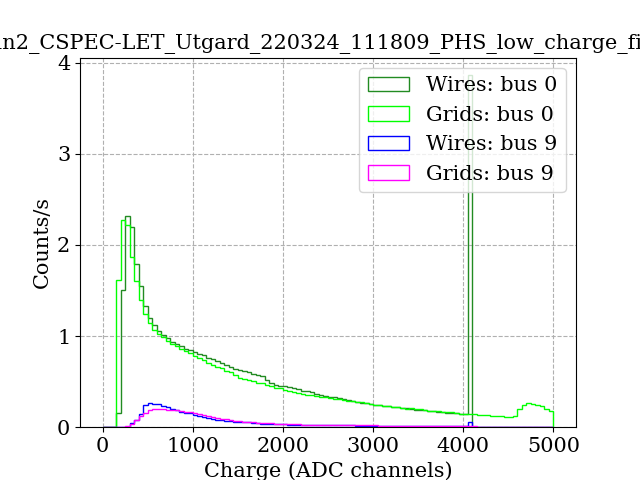

In [14]:
bus0=0
bus1=1
bus2=9
clusters01=mg_manage_seq.filter_data(mg_clu_run_1,mg_filter)
clusters9=mg_manage_ref.filter_data(clusters_ord,mg_coincidence_filter)
events01=mg_ev_run_1


mg_basic_plot_ref.mg_plot_pulses(file_name+'_PHS_low_charge_filt_after_gen_off', bus0, bus1, bus2 , 
                                 clusters01[clusters01.bus==bus0], events01[events01.bus==bus0], 
                                 clusters01[clusters01.bus==bus1], events01[events01.bus==bus1],
                                 clusters9[clusters9.bus==bus2], events_ord[events_ord.bus==bus2])



### Comparison of wires

In [ ]:
clusters_filtered=mg_manage.filter_data(clusters,mg_coincidence_filter)
wires=[ 34, 45, 67, 89]
save=False
mg_basic_plot_ref.mg_plot_wires_sep(file_name, clusters_filtered, wires, save)

## Plot charge distrobutions

### All over 2 grids:

In [ ]:
clusters_filtered=mg_manage.filter_data(clusters,mg_coincidence_filter)
mg_basic_plot_ref.plot_charge_distr(clusters_filtered,grid_channels, grid_adc)

### All over desided coincidence

In [ ]:
clusters_filtered=mg_manage.filter_data(clusters,mg_coincidence_filter)
mg_basic_plot_ref.mg_plot_grid_distrobution(clusters_filtered, grid_charges, grid,8,5,file_name)

# Look at the charge distrobution

In [ ]:
bus=9
clusters_filtered=mg_manage.filter_data(clusters,mg_coincidence_filter)
clusters_filtered=mg_manage.filter_data(clusters_filtered,mg_charge_filter)
mg_basic_plot_ref.mg_charge_dist(file_name, clusters_filtered, bus, False)